In [1]:
import pandas as pd
data = pd.read_csv('C:/Users/hp/Desktop/prj_pfe_inwi/traffic_matrix.csv') 
print(data.columns)

Index(['a_number', 'a_own', 'b_number', 'duration', 'duration_wh',
       'num_interactions', 'num_interactions_wh', 'num_interactions_sms',
       'num_interactions_sms_wh', 'offnet'],
      dtype='object')


In [28]:
print(data.columns)

Index(['a_number', 'a_own', 'b_number', 'duration_wh', 'num_interactions_wh',
       'num_interactions_voix_wh', 'num_interactions_sms_wh',
       'traffic_days_voix', 'traffic_days_sms', 'duration_voix_wh', 'offnet',
       'short_flag'],
      dtype='object')


In [29]:


# Compter le nombre d'occurrences des valeurs distinctes dans chaque colonne
for column in data.columns:
    value_counts = data[column].value_counts()
    print(f"Colonne '{column}':")
    print(value_counts)
    print()


Colonne 'a_number':
a5f95da477c5833c0459237da9146ab9    1074
4d1148d041ba877e2eacc395a1b555c6     580
a999e5e8347f6def5c920dbb758188f7     449
df3f2f832abeb7490f5b9c5ad0be2d52     421
64646c4a000bd007a0490a2af2709286     381
                                    ... 
b3737f432cea1f18a9c7fae2168a3791       1
1c67c0f0b9512f5ffce82910d9eb7066       1
7b93ec916f076bb9bbb73ac6f65b5c94       1
62b91dc124f187c54f2ccc1d84bf1f48       1
664d58e4a985af3a51e14ad8365617ef       1
Name: a_number, Length: 18696, dtype: int64

Colonne 'a_own':
True     399919
False        81
Name: a_own, dtype: int64

Colonne 'b_number':
215e2fdc742799e4bf065c6c81ea4091    11489
12ac8240dd12ea42d20e0856ef7fb255     1363
b0f8e6c4d905a030be78a792a616210b     1202
d726d252b73b2fc5c72e3f22ef204684      523
b99ab8538aa1ef8c3070fa3bdf23fb4f      499
                                    ...  
b4cb0381140f045d1c31e1f677bdc524        1
e07357e1b3a1ad8322c403ff65d25132        1
fd9c7577ef05605558d8eae17511c121        1
bd1ddf61dc

In [2]:
# Filtrer les colonnes catégorielles de type 'object'
colonnes_categorielles = data.select_dtypes(include=['object'])

# Afficher les colonnes catégorielles
print(colonnes_categorielles.columns)

Index(['a_number', 'b_number'], dtype='object')


In [3]:
print(data.columns)

Index(['a_number', 'a_own', 'b_number', 'duration', 'duration_wh',
       'num_interactions', 'num_interactions_wh', 'num_interactions_sms',
       'num_interactions_sms_wh', 'offnet'],
      dtype='object')


In [4]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

for colonne in colonnes_categorielles.columns:
    # Encoder la variable catégorielle
    encoded_variable = label_encoder.fit_transform(data[colonne])
    # Assigner les valeurs encodées à la colonne correspondante dans la dataframe
    data[colonne] = encoded_variable
    

C:\Users\hp\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:8

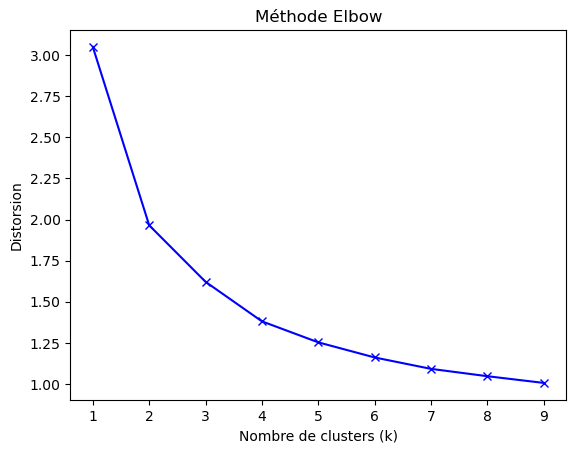

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import metrics
import numpy as np
from scipy.spatial.distance import cdist

# Sélectionner les colonnes pertinentes pour la méthode Elbow
# Ajoutez les noms des colonnes supplémentaires à la liste features
features = data1[['duration', 'duration_wh',
       'num_interactions', 'num_interactions_wh', 'num_interactions_sms',
       'num_interactions_sms_wh', 'offnet']]

# Normaliser les données si nécessaire (utilisez StandardScaler ou MinMaxScaler)

# Appliquer la méthode Elbow pour déterminer le nombre optimal de clusters
distortions = []
K = range(1, 10)  # Essayer différents nombres de clusters
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(features)
    kmeanModel.fit(features)
    distortions.append(sum(np.min(cdist(features, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / features.shape[0])

# Tracer la courbe de la variance expliquée en fonction du nombre de clusters
plt.plot(K, distortions, 'bx-')
plt.xlabel('Nombre de clusters (k)')
plt.ylabel('Distorsion')
plt.title('Méthode Elbow')
plt.show()


In [20]:
from sklearn.cluster import KMeans
import pandas as pd

# Sélection des colonnes pertinentes
selected_columns = ['duration', 'duration_wh','num_interactions', 'num_interactions_wh', 'num_interactions_sms','num_interactions_sms_wh', 'offnet']

# Extraction des données à partir des colonnes sélectionnées
X = data1[selected_columns]

# Instanciation et ajustement du modèle K-means
k = 5 # Nombre de clusters souhaité
kmeans = KMeans(n_clusters=k)
kmeans.fit(X)

# Récupération des étiquettes de cluster
labels = kmeans.labels_

# Récupération des coordonnées des centres de cluster
cluster_centers = kmeans.cluster_centers_

# Affichage des étiquettes de cluster pour chaque point de données
print(labels)

# Affichage des coordonnées des centres de cluster
print(cluster_centers)


C:\Users\hp\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[3 3 3 ... 3 3 1]
[[5.57455386e+00 4.94736124e+00 1.61071580e+00 1.19819328e+00
  1.99366341e-02 1.03277029e-02 7.14987715e-01]
 [1.22321132e+00 3.28802718e-01 9.04544946e-01 3.53589694e-01
  3.73858723e-01 1.83990374e-01 8.62439093e-01]
 [4.55103858e+00 3.21624646e-02 9.74515657e-01 2.05082113e-02
  1.12056218e-02 3.02442761e-03 6.83313167e-01]
 [7.52403730e+00 6.70620862e+00 2.93487925e+00 2.26027962e+00
  1.17299887e-01 6.42086195e-02 6.31876607e-01]
 [3.79139613e+00 3.49630649e+00 9.87807048e-01 8.27329557e-01
  8.89155481e-03 5.06034501e-03 7.20496377e-01]]


In [21]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_samples, silhouette_score

# Calcul du score de silhouette pour l'ensemble des données
silhouette_avg = silhouette_score(X, labels)
print("Le score de silhouette moyen est :", silhouette_avg)

Le score de silhouette moyen est : 0.4019155320053216


In [22]:
from sklearn.cluster import KMeans
import pandas as pd

# Sélection des colonnes pertinentes
selected_columns = ['duration', 'duration_wh','num_interactions', 'num_interactions_wh', 'num_interactions_sms','num_interactions_sms_wh', 'offnet']

# Extraction des données à partir des colonnes sélectionnées
X = data1[selected_columns]

# Instanciation et ajustement du modèle K-means
k = 4 # Nombre de clusters souhaité
kmeans = KMeans(n_clusters=k)
kmeans.fit(X)

# Récupération des étiquettes de cluster
labels = kmeans.labels_

# Récupération des coordonnées des centres de cluster
cluster_centers = kmeans.cluster_centers_

# Affichage des étiquettes de cluster pour chaque point de données
print(labels)

# Affichage des coordonnées des centres de cluster
print(cluster_centers)


C:\Users\hp\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[0 0 0 ... 0 0 3]
[[6.79869105e+00 6.04153771e+00 2.39969690e+00 1.81786447e+00
  7.11392631e-02 3.83743342e-02 6.68761534e-01]
 [4.55072440e+00 3.79926120e-02 9.75718765e-01 2.31692292e-02
  1.11413863e-02 3.01613333e-03 6.83925698e-01]
 [4.38338153e+00 3.97730238e+00 1.15412191e+00 9.16082731e-01
  1.11396884e-02 6.13361104e-03 7.19704102e-01]
 [1.31885487e+00 4.87272166e-01 9.03513421e-01 3.90678466e-01
  3.43788610e-01 1.69202586e-01 8.54290900e-01]]


In [19]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_samples, silhouette_score

# Calcul du score de silhouette pour l'ensemble des données
silhouette_avg = silhouette_score(X, labels)
print("Le score de silhouette moyen est :", silhouette_avg)

Le score de silhouette moyen est : 0.4412665750369899


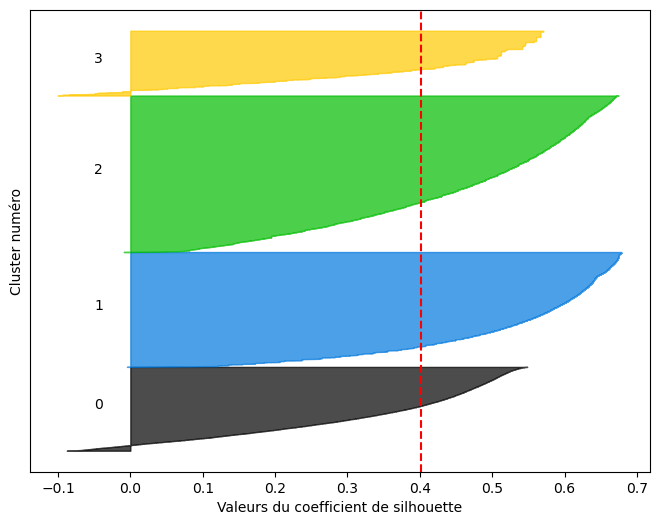

In [23]:
sample_silhouette_values = silhouette_samples(X, labels)

# Création d'un graphique en barres pour afficher les scores de silhouette
plt.figure(figsize=(8, 6))
y_lower = 10
for i in range(k):
    # Regroupez les scores de silhouette pour chaque cluster et triez-les
    ith_cluster_silhouette_values = sample_silhouette_values[labels == i]
    ith_cluster_silhouette_values.sort()

    # Calculez la hauteur de la barre
    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    # Remplissez le graphique en barres
    color = plt.cm.nipy_spectral(float(i) / k)
  
    plt.fill_betweenx(np.arange(y_lower, y_upper),
                      0, ith_cluster_silhouette_values,
                      facecolor=color, edgecolor=color, alpha=0.7)

    # Étiquette pour les clusters
    plt.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

    # Calcul de la prochaine position y_lower pour le prochain graphique
    y_lower = y_upper + 10

plt.xlabel("Valeurs du coefficient de silhouette")
plt.ylabel("Cluster numéro")
plt.axvline(x=silhouette_avg, color="red", linestyle="--")  # Ligne verticale pour le score de silhouette moyen
plt.yticks([])  # Supprimer les numéros de cluster (facultatif)
plt.show()


C:\Users\hp\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


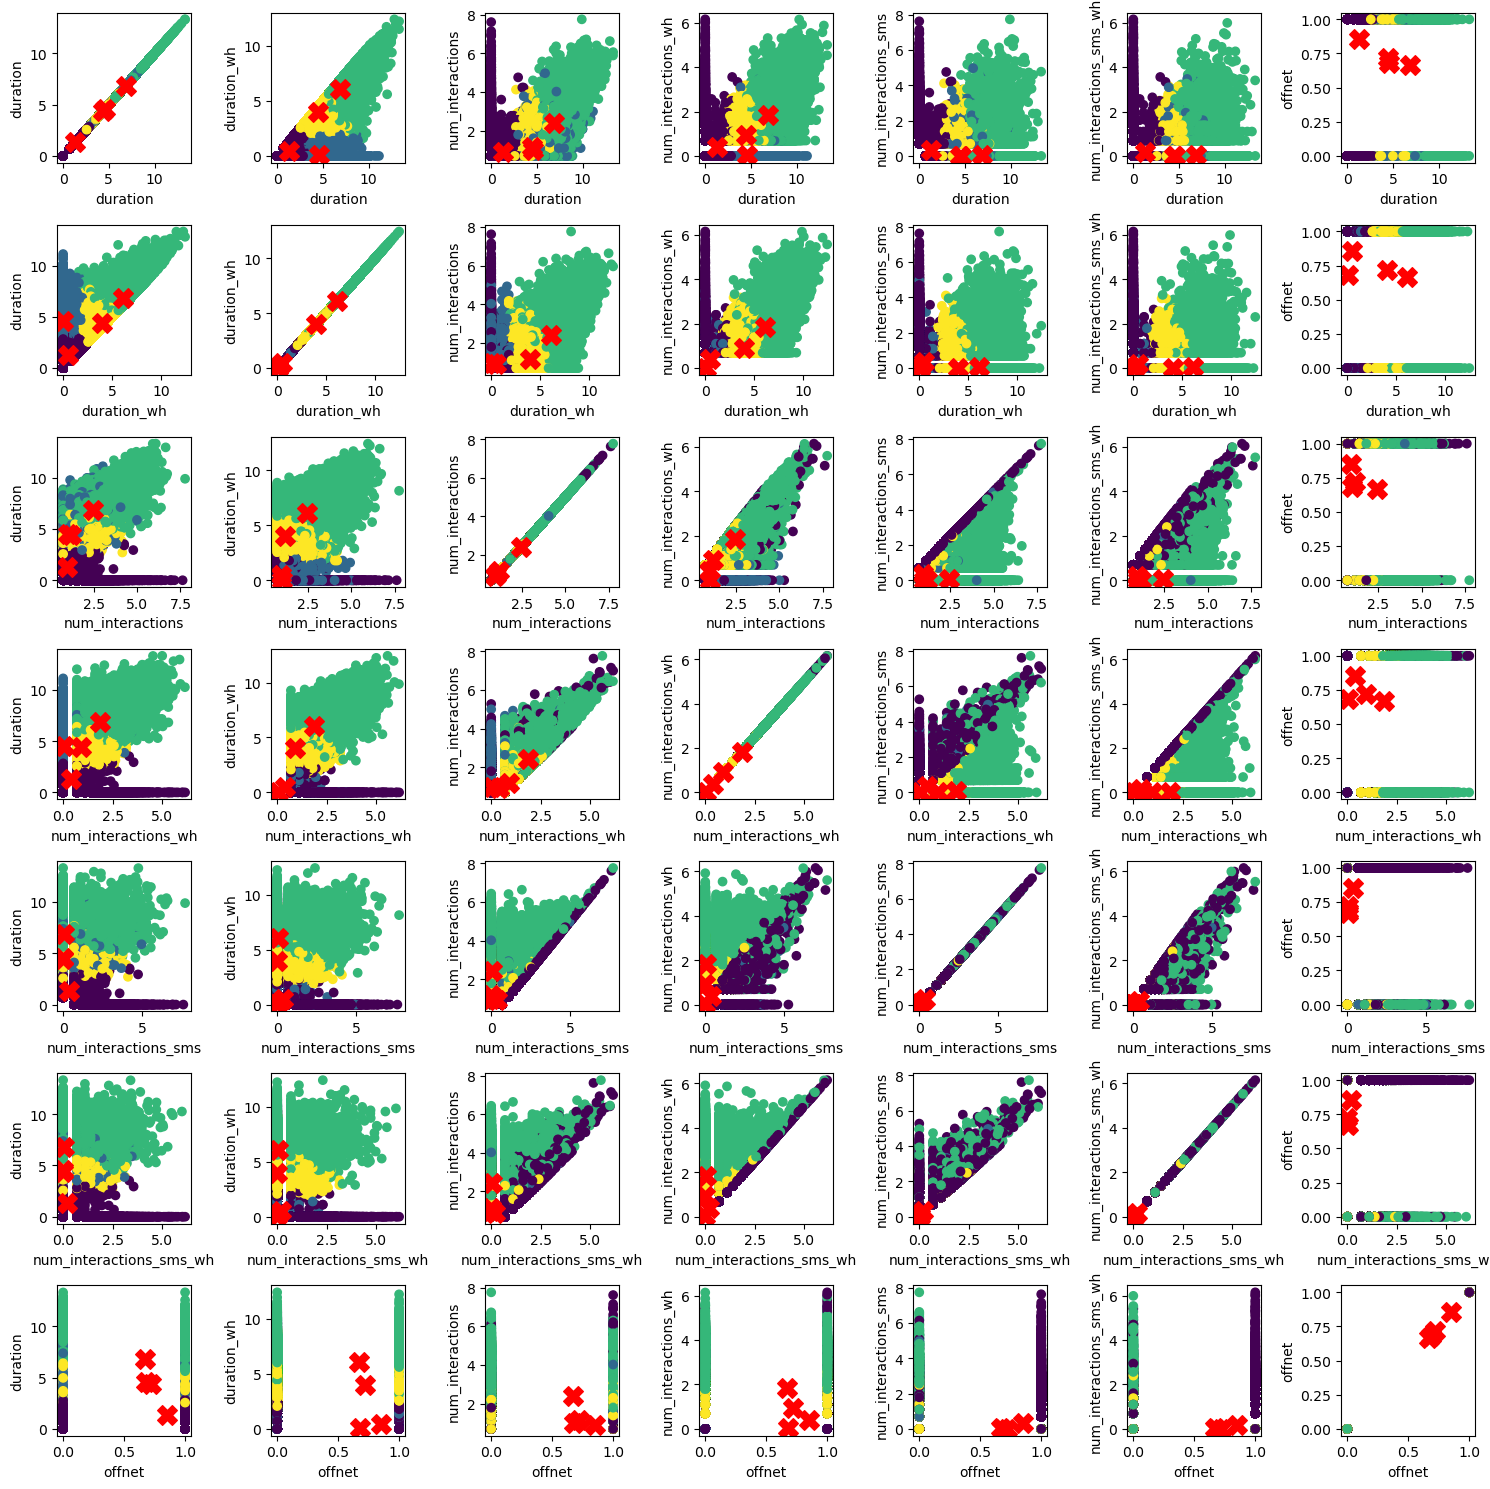

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from pandas.plotting import scatter_matrix

# Création d'un dataframe avec les colonnes spécifiées
df = pd.DataFrame(data, columns=['duration', 'duration_wh','num_interactions', 'num_interactions_wh', 'num_interactions_sms','num_interactions_sms_wh', 'offnet'])

# Liste des colonnes à utiliser pour le clustering et les scatter plots
columns = ['duration', 'duration_wh','num_interactions', 'num_interactions_wh', 'num_interactions_sms','num_interactions_sms_wh', 'offnet']


# Création d'un objet KMeans avec le nombre de clusters désiré
num_clusters = 4
kmeans = KMeans(n_clusters=num_clusters)

# Ajustement du modèle sur les données
kmeans.fit(df[columns])

# Prédiction des clusters pour chaque ligne du dataframe
labels = kmeans.predict(df[columns])

# Obtention des coordonnées des centres de clusters
cluster_centers = kmeans.cluster_centers_

# Affichage de la matrice de scatter plots avec les clusters, les groupes et les centres de clusters
fig, axes = plt.subplots(len(columns), len(columns), figsize=(15, 15))

for i, ax in enumerate(axes):
    for j, subplot_ax in enumerate(ax):
        # Scatter plot pour la combinaison de colonnes (i, j)
        subplot_ax.scatter(df[columns[i]], df[columns[j]], c=labels)
        subplot_ax.scatter(cluster_centers[:, i], cluster_centers[:, j], marker='X', color='red', s=200)
        subplot_ax.set_xlabel(columns[i])
        subplot_ax.set_ylabel(columns[j])

plt.tight_layout()
plt.show()


C:\Users\hp\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[0 0 0 ... 2 0 3]
[[6.81648808e+00 6.06065717e+00 2.40553693e+00 1.82356477e+00
  6.68904608e-02 3.67017371e-02 6.69379463e-01]
 [4.55792301e+00 3.71472919e-02 9.78780647e-01 2.31448144e-02
  1.10849999e-02 3.09915321e-03 6.82166822e-01]
 [4.39276088e+00 3.98428342e+00 1.15750940e+00 9.17703889e-01
  1.05549603e-02 5.65898312e-03 7.19693908e-01]
 [1.31263964e+00 4.83545153e-01 9.03054585e-01 3.93650208e-01
  3.44226822e-01 1.72661517e-01 8.53729896e-01]]
Caractéristiques du cluster 0:
duration                   6.820302
duration_wh                6.064175
num_interactions           2.407949
num_interactions_wh        1.825444
num_interactions_sms       0.067057
num_interactions_sms_wh    0.036775
offnet                     0.669097
dtype: float64


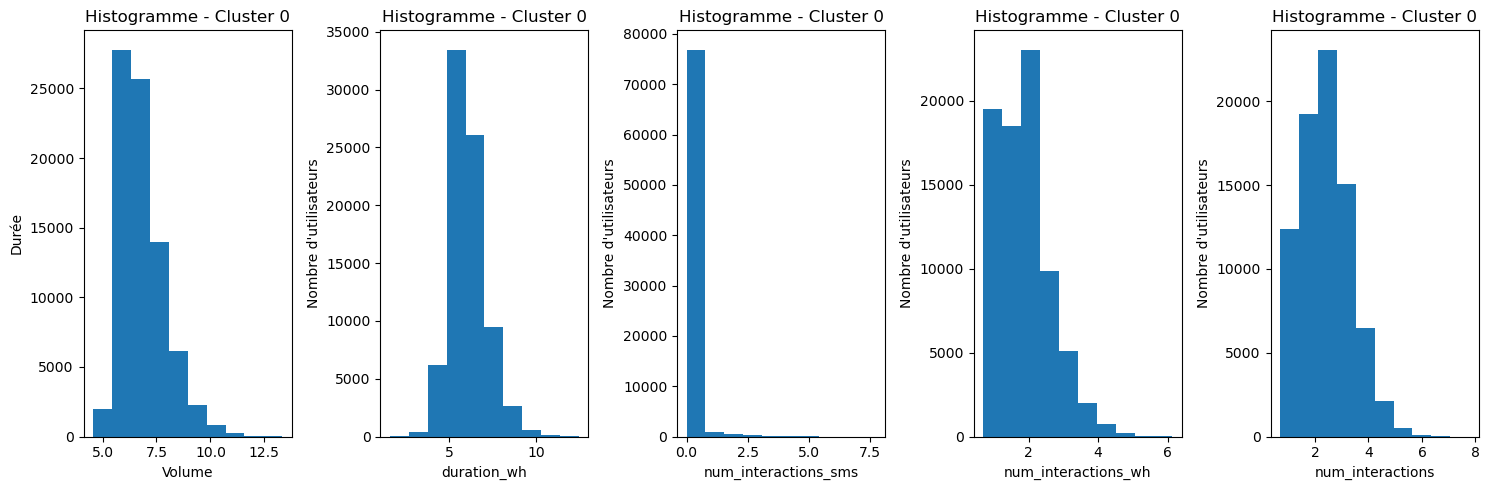

Caractéristiques du cluster 1:
duration                   4.557912
duration_wh                0.037267
num_interactions           0.978811
num_interactions_wh        0.023191
num_interactions_sms       0.011099
num_interactions_sms_wh    0.003099
offnet                     0.682178
dtype: float64


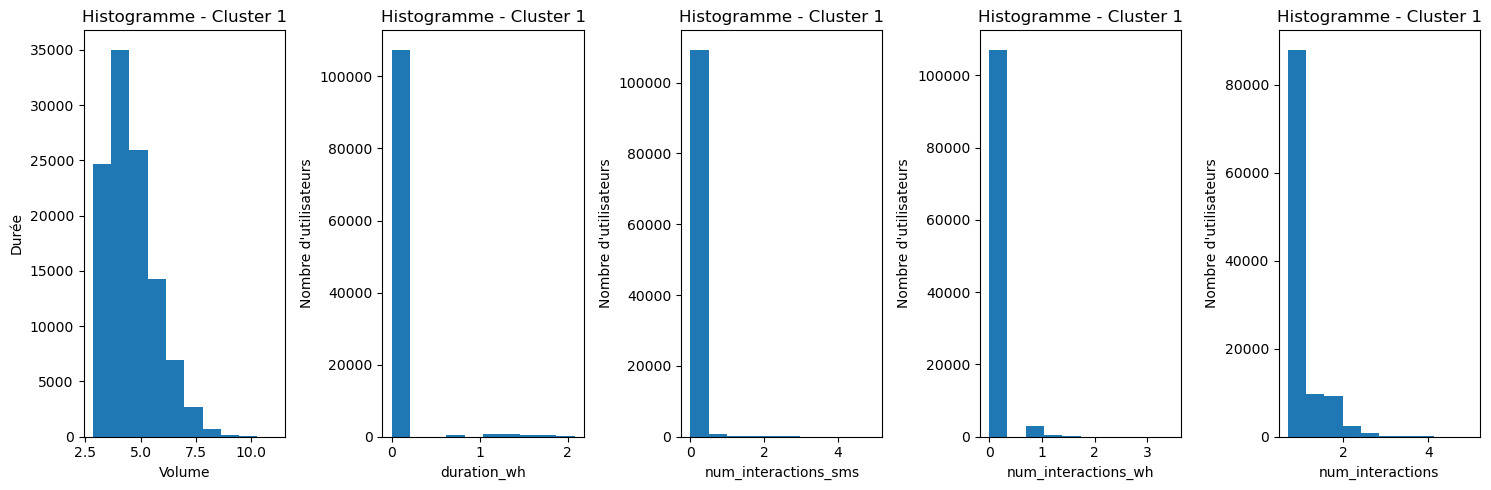

Caractéristiques du cluster 2:
duration                   4.395130
duration_wh                3.986288
num_interactions           1.158445
num_interactions_wh        0.918337
num_interactions_sms       0.010557
num_interactions_sms_wh    0.005676
offnet                     0.719739
dtype: float64


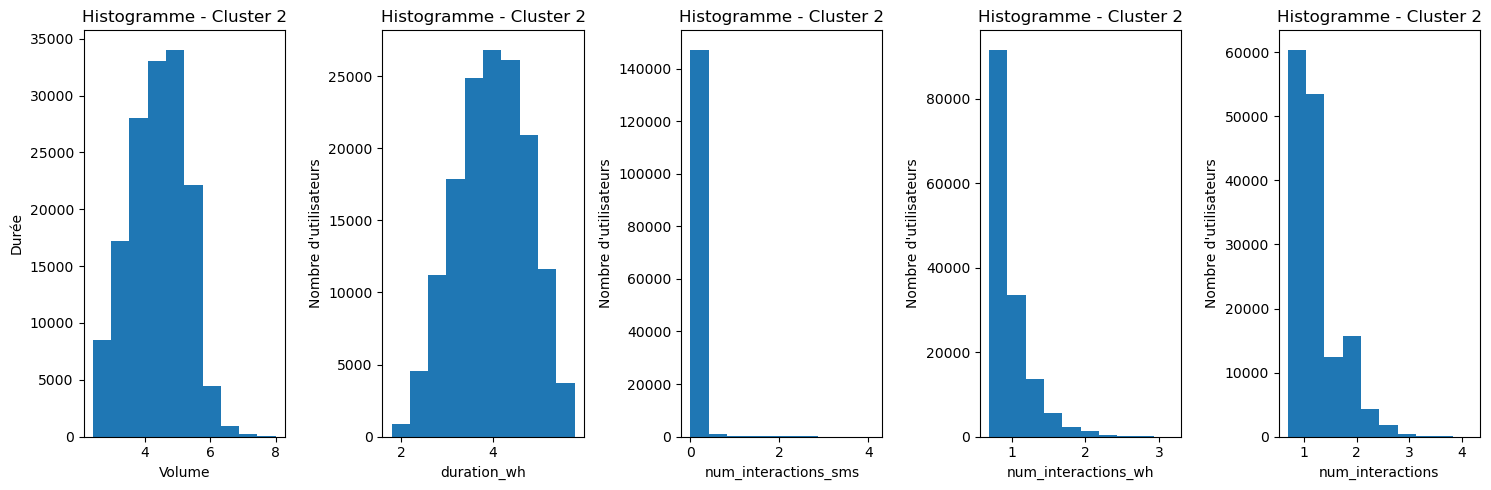

Caractéristiques du cluster 3:
duration                   1.312734
duration_wh                0.483656
num_interactions           0.903097
num_interactions_wh        0.393691
num_interactions_sms       0.344205
num_interactions_sms_wh    0.172650
offnet                     0.853739
dtype: float64


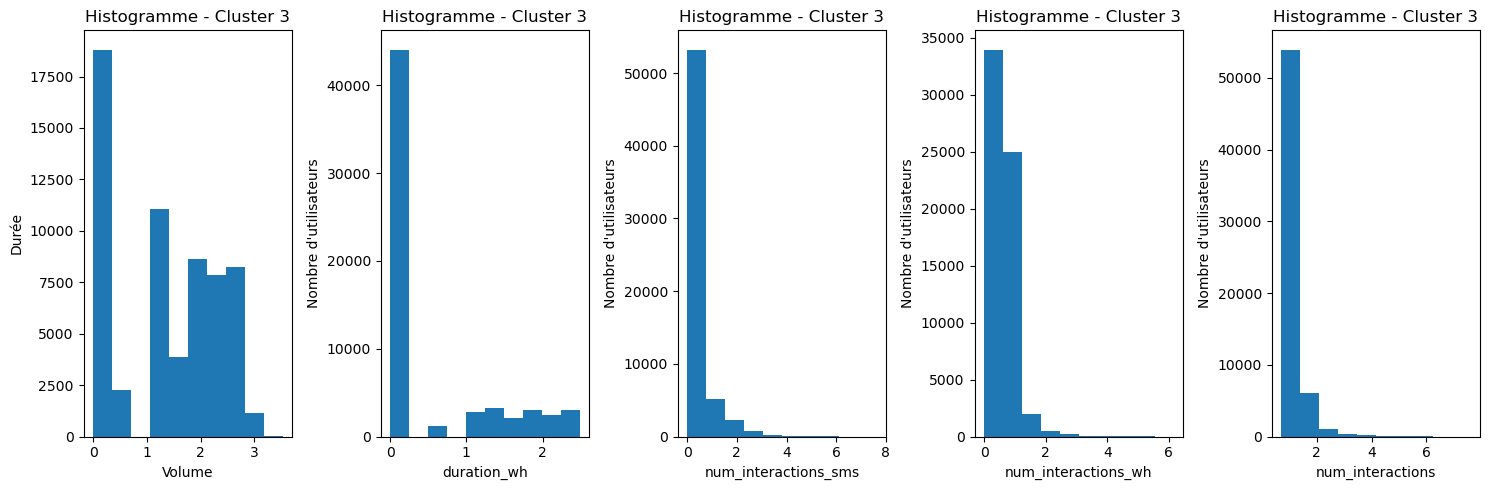

In [30]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import pandas as pd

# Sélection des colonnes pertinentes
selected_columns = ['duration', 'duration_wh','num_interactions', 'num_interactions_wh', 'num_interactions_sms','num_interactions_sms_wh', 'offnet']



# Extraction des données à partir des colonnes sélectionnées
X = data[selected_columns]

# Instanciation et ajustement du modèle K-means
k = 4  # Nombre de clusters souhaité
kmeans = KMeans(n_clusters=k)
kmeans.fit(X)

# Récupération des étiquettes de cluster
labels = kmeans.labels_

# Récupération des coordonnées des centres de cluster
cluster_centers = kmeans.cluster_centers_

# Affichage des étiquettes de cluster pour chaque point de données
print(labels)

# Affichage des coordonnées des centres de cluster
print(cluster_centers)

# Extraction des caractéristiques pour chaque classe
data['cluster_labels'] = labels
for cluster_label in range(k):
    cluster_data = data[data['cluster_labels'] == cluster_label]
    cluster_features = cluster_data[selected_columns].mean()
    print(f"Caractéristiques du cluster {cluster_label}:")
    print(cluster_features)
    
    plt.figure(figsize=(15, 5))  # Définit la taille de la figure globale

    plt.subplot(151)  # Crée le premier sous-graphique
    plt.hist(cluster_data['duration'], bins=10)
    plt.xlabel('Volume')
    plt.ylabel('Durée')
    plt.title(f'Histogramme - Cluster {cluster_label}')

    plt.subplot(152)  # Crée le deuxième sous-graphique
    plt.hist(cluster_data['duration_wh'], bins=10)
    plt.xlabel('duration_wh')
    plt.ylabel("Nombre d'utilisateurs")
    plt.title(f'Histogramme - Cluster {cluster_label}')

    plt.subplot(153)  # Crée le troisième sous-graphique
    plt.hist(cluster_data['num_interactions_sms'], bins=10)
    plt.xlabel('num_interactions_sms')
    plt.ylabel("Nombre d'utilisateurs")
    plt.title(f'Histogramme - Cluster {cluster_label}')

    plt.subplot(154)  # Crée le quatrième sous-graphique
    plt.hist(cluster_data['num_interactions_wh'], bins=10)
    plt.xlabel('num_interactions_wh')
    plt.ylabel("Nombre d'utilisateurs")
    plt.title(f'Histogramme - Cluster {cluster_label}')

    plt.subplot(155)  # Crée le cinquième sous-graphique
    plt.hist(cluster_data['num_interactions'], bins=10)
    plt.xlabel('num_interactions')
    plt.ylabel("Nombre d'utilisateurs")
    plt.title(f'Histogramme - Cluster {cluster_label}')

    plt.tight_layout()  # Ajuste l'espacement entre les sous-graphiques
    plt.show()
